# Suicide Rate Distribution Across Countries
This analysis aims to discover how the world is severly experiencing suicide

The suicide rates categorised into four ranges -  0-100, 100-200, 200-300, 300-400, >400

The plots illustrate how many countries are in each range of suicide rate.


In [2]:
# ========= Import the packages =========
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Importing Customised Common Data Reader Class
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideProcessedData

In [60]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader()

# Load Suicide Rate Tiday data done with Pivot Longer the rate of all age ranges
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
suicide_rate_data.head()

,country,sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,all_age
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,93.2
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8,157.1
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2,35.1
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,65.1
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1,86.3


In [56]:
# ========= Prepare Data ========= #

# This function serves to categorise (discretize)  the continuous variable value - 'suicide rate'
# Binning into 4 ranges of suicide rate
def suicide_rate_classification(rate):
    #rate = data[['all_age']]
    if (rate > 0 and rate <= 100):
        return "0-100"
    elif (rate > 100 and rate <=200):
        return "100-200"
    elif (rate >200 and rate <= 300):
        return "200-300"
    elif (rate > 300 and rate <= 400):
        return "300-400"
    else :
        return ">400"

# ====== Prepare Data for Plot (1) ======
# Filter the data for Both Sex only
suicide_rate_allage_bothsex = suicide_rate_data[suicide_rate_data["sex"] == "Both sexes"][["country", "sex", "all_age"]]
    
# Trigger the discretization function and store the result into the new column "suicide_rate_class"   
suicide_rate_allage_bothsex = suicide_rate_allage_bothsex.\
    assign(suicide_rate_class = lambda x: x["all_age"].map(lambda y: suicide_rate_classification(y)))

suicide_rate_allage_bothsex

,country,sex,all_age,suicide_rate_class
0,Afghanistan,Both sexes,93.2,0-100
3,Albania,Both sexes,65.1,0-100
6,Algeria,Both sexes,38.8,0-100
9,Angola,Both sexes,165.8,100-200
12,Antigua and Barbuda,Both sexes,8.1,0-100
...,...,...,...,...
534,Venezuela (Bolivarian Republic of),Both sexes,43.3,0-100
537,Viet Nam,Both sexes,89.4,0-100
540,Yemen,Both sexes,92.1,0-100
543,Zambia,Both sexes,204.9,200-300


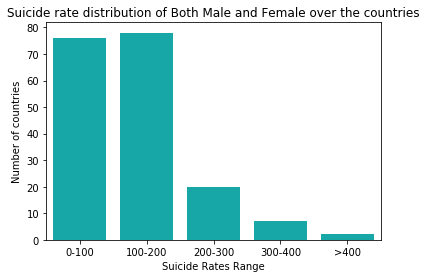

In [123]:
#=========== Plotting (1)==============#

# The plot to visualise how many countries are in each range of suicide rate
sns.countplot(x="suicide_rate_class", data=suicide_rate_allage_bothsex, color="c")
plt.title("Suicide rate distribution of Both Male and Female over the countries")
plt.ylabel("Number of countries")
plt.xlabel("Suicide Rates Range")
plt.show()

In [113]:
# ====== Prepare Data for Plot (2) ======

# Filter the data for male and female only 
suicide_rate_cat_by_sex = suicide_rate_data[suicide_rate_data['sex'] != 'Both sexes'][["country", "sex", "all_age"]]
# Trigger the discretization function to bin the suicide rate
suicide_rate_cat_by_sex = suicide_rate_cat_by_sex.assign(suicide_rate_class = lambda x: x["all_age"].map(lambda y: suicide_rate_classification(y)))
suicide_rate_cat_by_sex


,country,sex,all_age,suicide_rate_class
1,Afghanistan,Male,157.1,100-200
2,Afghanistan,Female,35.1,0-100
4,Albania,Male,86.3,0-100
5,Albania,Female,46.1,0-100
7,Algeria,Male,56.2,0-100
...,...,...,...,...
542,Yemen,Female,58.4,0-100
544,Zambia,Male,343.6,300-400
545,Zambia,Female,102.1,100-200
547,Zimbabwe,Male,584.7,>400


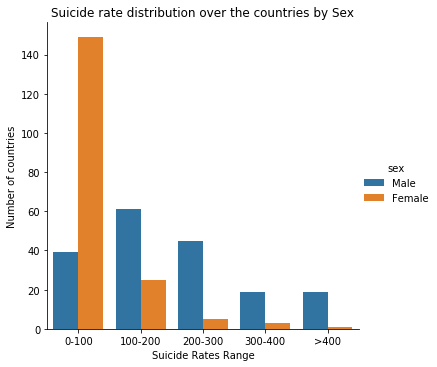

In [124]:
#=========== Plotting (2)==============#

# The plot is to visualise and compare the variation of number of counties in Male-Female distribution of suicide rates 

rate_bin_list=["0-100", "100-200", "200-300", "300-400", ">400"]

##https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="suicide_rate_class", hue="sex", kind="count", data=suicide_rate_cat_by_sex, order=rate_bin_list)
plt.title("Suicide Rate distribution over the Countries by Sex")
plt.ylabel("Number of countries")
plt.xlabel("Suicide Rates Range")
plt.show()